In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lending_club_loan.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Task 1 Exploratory Data Analysis

## Task 1.1

### Plotting countplot for loan_status column

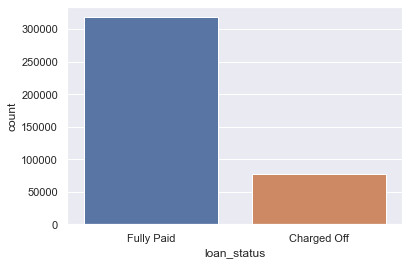

In [3]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="loan_status", data=df)

In [4]:
df.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

### Label Encoding the column loan_status to convert categorical into numeric

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_encoded = le.fit_transform(df['loan_status'])
df['loan_status'] = status_encoded
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

Since loan_status was a categorical column and to plot histogram we need numerical data hence lebel encoded the loan_status column

### Plotting histogram for loan_status column 

array([[<AxesSubplot:title={'center':'loan_status'}>]], dtype=object)

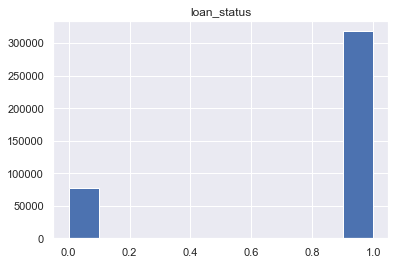

In [6]:
df.hist(column='loan_status')

In [7]:
df['loan_status']=le.inverse_transform(df['loan_status'])

In [8]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

## Task 1.2

### Correlation between the continous feature variable 

In [9]:
# correlation between different variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


With the help of corr() we can find the pairwise correlation of all columns in a dataframe. Here is the correlation between all the continuous numeric variable

## Task 1.3

### Visualizing the correlation between features using a heatmap.

<AxesSubplot:>

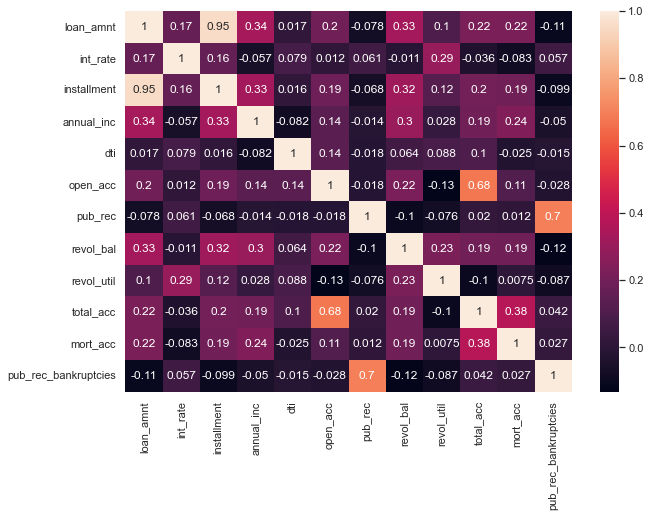

In [10]:
# setup the matplotlib plot configuration
plt.figure(figsize=(10, 7))
# draw the heatmap
sns.heatmap(df.corr(),annot=True,cmap="rocket")
#plt.ylim(10, 0)

The value of correlation can take any value ranging from -1 to 1. A graphical representation of correlation heatmap which represents correlation between the continuous feature variables of the dataframe.

## Task 1.5 

### Boxplot between loan_amnt and loan_status

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

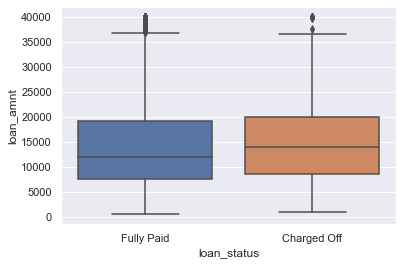

In [11]:
np.random.seed(42)
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

Relationship between loan_status and loan_amnt. For boxplot, the categorical column name is passed to the x variable whereas the numeric value will be passed to the y variable. 

## Task 1.6

### Summary statistics for the loan amount, grouped by the loan_status

In [12]:
df[["loan_amnt", "loan_status"]].groupby("loan_status").describe()
#df.groupby("loan_status")["loan_amnt"].descirbe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

A subselection on these two columns is made first: df[["loan_amnt", "loan_status"]]. After that the groupby() method is applied on the loan_status column to make a group per category. The average loan amount for every loan status is calculated and returned.

## Task 1.7

### Analyzing Grade and SubGrade Column

In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

### Countplot per grade

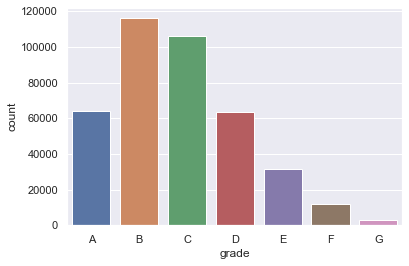

In [15]:
ax = sns.countplot(x="grade", data=df,order = sorted(df['grade'].unique()))

## Task 1.8

### Displaying countplot subgrade

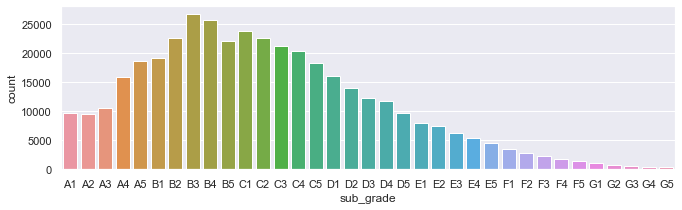

In [16]:
plt.figure(figsize=(11,3))
ax = sns.countplot(x="sub_grade", order = sorted(df['sub_grade'].unique()), data=df)

Countplot for the subgrade column. Sorted the column sub_grade so that we can get a clear countplot. 

### Exploring all loans made per subgrade based on the loan_status

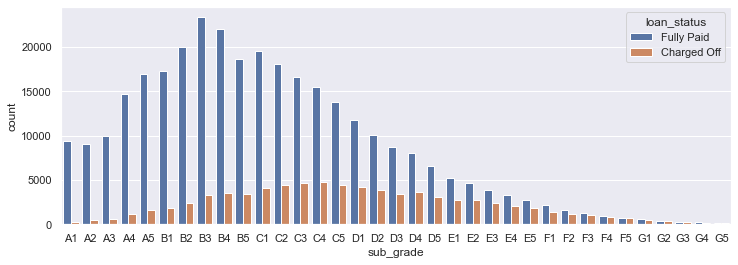

In [17]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="sub_grade", order = sorted(df['sub_grade'].unique()), data=df, hue = 'loan_status')

## Task 1.9

### Subgrade which don't get paid often

There are two subgrades in the dataset that don't get paid often and those are F(1-5) and G(1-5).

In [18]:
subgrade = df[(df['grade']=='F') | (df['grade']=='G')]

### Unique possible grades and subgrade

In [19]:
unique_grades = sorted(subgrade['sub_grade'].unique())

### Countplot per grade

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

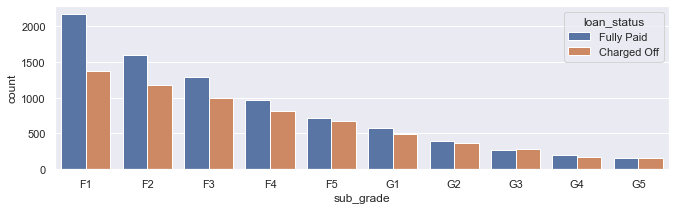

In [20]:
plt.figure(figsize=(11,3))
sns.countplot(x='sub_grade',data=subgrade,order = unique_grades,hue='loan_status')

## Task 1.10

### Creating a new column  loan_repaid.

In [21]:
df['loan_repaid'] = df['loan_status'].map({'Charged Off':0, 'Fully Paid':1})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


## Bonus Task

### Bar plot showing the correlation of the numeric features to the new loan_repaid column.

In [22]:
df_corr = df[df.columns[1:]].corr()['loan_repaid'][:]
df_corr

int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

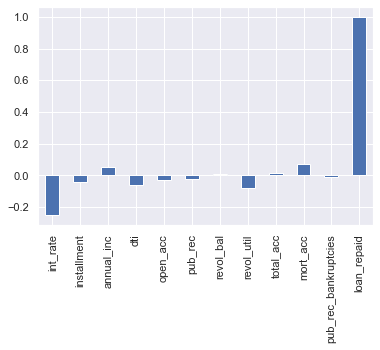

In [23]:
ax = df_corr.plot.bar(stacked=True)
#sns.set_theme(style="darkgrid")
#ax = sns.barplot(x="loan_status", data=df_corr)

# Task 2 Data Preprocessing

## Task 2.1 

### Count missing values

In [24]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Displaying total no of missing values per column

In [25]:
missing = round(100*(df.isnull().sum()/len(df.loan_amnt)), 2)
missing.loc[missing > 0]

emp_title               5.79
emp_length              4.62
title                   0.44
revol_util              0.07
mort_acc                9.54
pub_rec_bankruptcies    0.14
dtype: float64

Displaying total no of missing values per column in percentage. 

## Task 2.2

### Drop emp_title

In [26]:
df = df.drop('emp_title',axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

## Task 2.3

### Count plot of the emp_length feature column

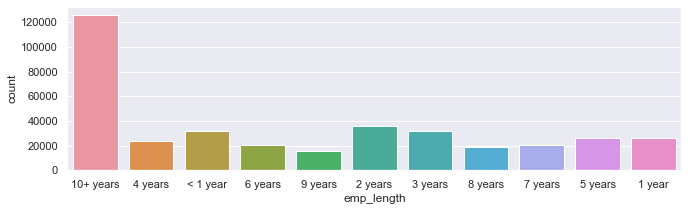

In [28]:
plt.figure(figsize=(11,3))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emp_length", data=df)


### Sort the order of the values

<AxesSubplot:xlabel='emp_length', ylabel='count'>

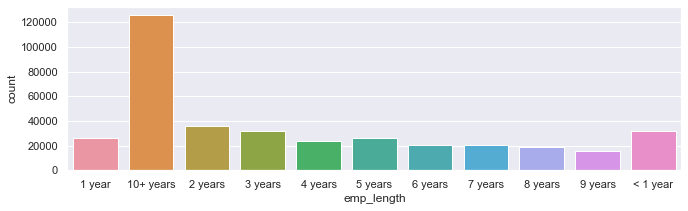

In [29]:
plt.figure(figsize=(11,3))
sns.countplot(x='emp_length',data=df,order = sorted(df['emp_length'].dropna().unique()))

## Task 2.4

### Countplot separating Fully Paid vs Charged Off

In [30]:
sort = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
                    '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

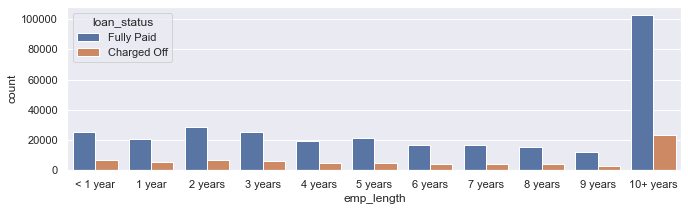

In [31]:
plt.figure(figsize=(11,3))
sns.countplot(x='emp_length',data=df,order=sort, hue = 'loan_status')

In [32]:
df = df.drop('loan_status',axis=1)

## Task 2.5

### Percentage of charge offs per category

In [33]:
charged_off = df[df['loan_repaid']==0].groupby("emp_length").count()['loan_repaid']

In [34]:
fully_paid= df[df['loan_repaid']==1].groupby("emp_length").count()['loan_repaid']

### Percent of people per employment category that didn't pay back their loan

In [35]:
per = charged_off/fully_paid
per

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

### Visualize it with bar plot

<AxesSubplot:xlabel='emp_length'>

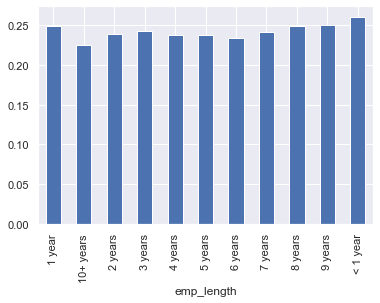

In [36]:
per.plot(kind='bar')

## Task 2.6

### Relation between Charge off rates and employment lengths

As we can see from the above graph that there is not much relation between emp_length and charged off since the 
graph that is plotted is all over same. Hence, from this analysis we can say that it is better to drop the emp_length column. 

In [37]:
df = df.drop('emp_length', axis = 1)

## Task 2.7 & 2.8

### Relation between title column vs the purpose column

In [38]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [39]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

As we can see that both of these columns are somewhat same. The data present inside both of the columns are same. It seems like title is a subcategory of the purpose column. Hence we can simply drop title column. 

### Drop column title

In [40]:
df = df.drop('title', axis =1)

## Task 2.9

### Analysing the mort_acc feature and create a value_counts of the mort_acc column. 

In [41]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Count missing values

Now, lets see how many missing values are present in mort_acc.

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We can see that mort_acc has the maximum no of missing values present in the dataframe. Hence, we should fill these missing values of the mort_acc column with something. 

## Task 2.10

### Find correlation 

To fill the missing values with something, we must first find the correlation of the mort_acc. Now, let's check the correlation of mort_acc with other numeric columns.

In [43]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

From the above data we can see that total_acc comes out to be 0.381072 which is the correlating with mort_acc. It means that total_acc columns resembles the most as compared to other columns of the dataframe. Hence we can fill the missing data with the mean of the mort_acc column correlated with its total_acc value.

### Mean of mort_acc column per total_acc column

Now we will fill the na values of the mort_acc column with the mean of total_acc column.

In [44]:
fill_na = df['total_acc'].mean()
fill_na

25.41474383253794

In [45]:
df['mort_acc'] = df['mort_acc'].fillna(fill_na)
df['mort_acc']

0          0.000000
1          3.000000
2          0.000000
3          0.000000
4          1.000000
            ...    
396025     0.000000
396026     1.000000
396027     0.000000
396028     5.000000
396029    25.414744
Name: mort_acc, Length: 396030, dtype: float64

Now, we will define a function which will check if the mort_acc is empty. If mort_acc is empty then it will return the avg of total_acc column value.

### Check if there are still na values present in the dataframe for mort_acc

In [46]:
df['mort_acc'].isnull().sum()

0

## Task 2.11

In [47]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

We still have missing values present in the dataframe. The missing values that we have in revol_bal and pub_rec_bankruptcies is very less hence we can drop both of them. 

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Task 2.12

### Columns that are currently non-numeric.

Now, lets see all the categorical columns in the dataframe. We can check that by using the datatype object.

In [50]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

## Task 2.13

### Term feature conversion into either a 36 or 60 integer numeric data type

In [51]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

To convert this we are going to use map().

In [52]:
df['term'] = df['term'].map(lambda term: int(term[:3]))

In [53]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

## Task 2.14

### Drop the column grade

We can easily drop the column grade since in the task 1 we have seen that it is already a sub category of the column sub_grade.

In [54]:
df = df.drop('grade', axis = 1)

No loss of information by dropping grade column.

## Task 2.15

### Converting the subgrade into dummy variables

In [55]:
dummy_variable= pd.get_dummies(df['sub_grade'],drop_first=True)

### Concatenating these columns to the original dataframe

In [56]:
df = pd.concat([df.drop('sub_grade',axis=1),dummy_variable],axis=1)

In [57]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

## Task 2.16

### Convert columns into dummy variables 

In [58]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

Now we will convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables.

In [59]:
dummy = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],
                         drop_first = True)

### Dropping the original columns

In [60]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

### Concatenate the columns with the original dataframe

In [61]:
df = pd.concat([df,dummy],axis=1)

### Check the categorical columns

In [62]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line', 'address'], dtype='object')

## Task 2.17

### Display the count for the various possible values of home_ownership column

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

## Task 2.18

### Convert these into dummy variables

Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Set drop_first=True and to drop the original columns.

In [64]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [66]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

### Drop the original column

In [67]:
df = df.drop(['home_ownership'],axis=1)

### Concatenating with original dataframe

In [68]:
df = pd.concat([df,dummies],axis=1)

In [69]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Task 2.19

### Creating a column called 'zip_code'


### Extracting the zip_code from the address column

In [70]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [71]:
df["zip_code"] = df["address"].apply(lambda x: x[-5:])

In [72]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

## Task 2.20

### Making zip_code column into dummy variables 

In [73]:
dummy_zip = pd.get_dummies(df["zip_code"], drop_first=True)

### Drop the original column zip_code column

In [74]:
df.drop("zip_code", axis=1, inplace=True)

### Concatinating with original dataframe

In [75]:
df = pd.concat([df,dummy_zip],axis=1)

### Drop the original column address column

In [76]:
df.drop("address", axis=1, inplace=True)

In [77]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
    

In [78]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


## Task 2.21

### Analyze “earliest_cr_line”

In [79]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

### Extract the year from this feature then convert it to a numeric feature

In [80]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [81]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

### Drop the earliest_cr_line feature

In [82]:
df = df.drop(['earliest_cr_line'],axis=1)

In [83]:
df.select_dtypes(['object']).count()

issue_d    395219
dtype: int64

In [84]:
df.drop("issue_d", axis=1, inplace=True)

In [85]:
df.select_dtypes(['object']).count()

Series([], dtype: int64)

In [86]:
df.select_dtypes(["object"]).columns

Index([], dtype='object')

# Task 3 Train - Test Split

### Task 3.1

### First lets import the train test from sklearn

In [87]:
# import all the relevant libraries.
from sklearn.model_selection import train_test_split

### Now let's set X and y variables to the values of the features and label

In [88]:
# X here will have all the columns apart from loan_repaid. 
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

# Task 4 Grabbing a Sample for Training Time

### Task 4.1 

### Perform a train/test split with test_size=0.2 and a random_state of 101

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Task 4.2

###  Using MinMaxScaler to normalize the feature data X_train and X_test

First let's import the MinMax scaler from Sklearn

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)

In [93]:
X_test = scaler.transform(X_test)

# Task 5 Creating the Model

## Task 5.1

In [94]:
# import all the relevant libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [95]:
# we will be building a sequential model.
ann = tf.keras.models.Sequential()
# input layer 
ann.add(Dense(79, activation="relu"))
ann.add(Dropout(0.2))
# Hidden layer
ann.add(Dense(38, activation="relu"))
ann.add(Dropout(0.2))
# Output layer
ann.add(Dense(1, activation="sigmoid"))
# compiling and taking the adam optimizer.
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
# Fit the model to the training data for at least 25 epochs and batch_size of 256.
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

2021-11-14 22:36:10.051093: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-14 22:36:10.052812: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 11s 34us/sample - loss: 0.2986 - val_loss: 0.2647
Epoch 2/25
316175/316175 [==============================] - 10s 30us/sample - loss: 0.2650 - val_loss: 0.2629
Epoch 3/25
316175/316175 [==============================] - 9s 29us/sample - loss: 0.2630 - val_loss: 0.2621
Epoch 4/25
316175/316175 [==============================] - 9s 29us/sample - loss: 0.2618 - val_loss: 0.2615
Epoch 5/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2607 - val_loss: 0.2615
Epoch 6/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2599 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 9s 29us/sample - loss: 0.2596 - val_loss: 0.2610
Epoch 8/25
316175/316175 [==============================] - 9s 28us/sample - loss: 0.2592 - val_loss: 0.2609
Epoch 9/25
316175/316175 [==============================] - 12s 39us/sample

In [97]:
from tensorflow.keras.models import load_model

Now I am going to save my model with the name Rishita_model_A3

In [99]:
ann.save('Rishita_model_A3.h5')  

# Task 6 Evaluating Model Performance

## Task 6.1

### Validation loss versus the training loss

This callback is automatically applied to every Keras model. The History object gets returned by the fit method of models.

In [101]:
val_loss = pd.DataFrame(model.history.history)

### Plot out the validation loss versus the training loss.

<AxesSubplot:>

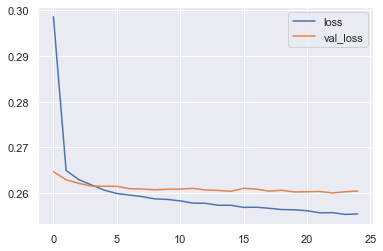

In [102]:
val_loss[['loss','val_loss']].plot()
# as we can see our loss for the model is preety less which is good. 

## Task 6.2

### Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set

In [103]:
predictions = model.predict_classes(X_test)

### Confusion matrix

In [104]:
# to plot the confusion matrix we will import the relevant confusion matrix libraries
from sklearn.metrics import classification_report,confusion_matrix

Confusion matrix to check how our model is performing.  

In [105]:
# Now we will evaluate the accuracy of the model. 
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 7060,  8598],
       [  263, 63123]])

## Task 6.3

### Select any random customer from the dataset, would you offer this person a loan?

Using the code given in the pdf file. Hint 

In [106]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

## Task 6.4

### Now check, did this person actually end up paying back their loan?

In [107]:
df.iloc[random_ind]['loan_repaid']

1.0

Yes this person did pay the loan since it is 1 which refers to fully paid.